In [1]:
"""
CSE5280 Homework 1
Tyler Gutowski
Transformations for cartesian and homogenous coordinate systems
"""
import math
from vedo import dataurl, Mesh, Sphere, show
import numpy as np

In [2]:
def cartesian_rotation(source, delta_x: float, delta_y: float, delta_z: float):
    
    x_rotation_matrix = np.array(
    [[          1.0,                0.0,                0.0], 
     [          0.0,  math.cos(delta_x), -math.sin(delta_x)],
     [          0.0,  math.sin(delta_x),  math.cos(delta_x)]])
    
    y_rotation_matrix = np.array(
    [[ math.cos(delta_y),           0.0,  math.sin(delta_y)], 
     [               0.0,           1.0,                0.0],
     [-math.sin(delta_y),           0.0,  math.cos(delta_y)]])
    
    z_rotation_matrix = np.array(
    [[ math.cos(delta_z), -math.sin(delta_z),           0.0], 
     [ math.sin(delta_z),  math.cos(delta_z),           0.0],
     [               0.0,                0.0,           1.0]])
    
    xy_rotation_matrix = np.matmul(x_rotation_matrix, y_rotation_matrix)
    xyz_rotation_matrix = np.matmul(xy_rotation_matrix, z_rotation_matrix)
    
    rotated_matrix = np.matmul(source, xyz_rotation_matrix)
    return rotated_matrix

In [3]:
def cartesian_reflection(source, flip_over_x: bool, flip_over_y: bool, flip_over_z: bool):
    
    reflection_matrix = np.array(
       [[1, 0, 0],
        [0, 1, 0], 
        [0, 0, 1]])
    
    if flip_over_x:
        reflection_matrix[1][1] *= -1
        reflection_matrix[2][2] *= -1
    if flip_over_y:
        reflection_matrix[0][0] *= -1
        reflection_matrix[2][2] *= -1
    if flip_over_z:
        reflection_matrix[0][0] *= -1
        reflection_matrix[1][1] *= -1
    
    reflected_matrix = np.matmul(source, reflection_matrix)
    return reflected_matrix

In [4]:
def cartesian_scale(source, delta_x: float, delta_y: float, delta_z: float):
    
    scale_matrix = np.array(
    [[delta_x,     0.0,     0.0], 
     [    0.0, delta_y,     0.0],
     [    0.0,     0.0, delta_z]])
    
    scaled_matrix = np.matmul(source, scale_matrix)
    
    return scaled_matrix

In [5]:
def homogenous_translate(source, delta_x: float, delta_y: float, delta_z: float):
    
    cartesian_source = np.insert(source, 3, 1, axis=1)

    translation_matrix = np.array(
       [[      1,       0,       0, 1],
        [      0,       1,       0, 1],
        [      0,       0,       1, 1],
        [delta_x, delta_y, delta_z, 1]])
    
    homogenous_translation = np.matmul(cartesian_source, translation_matrix)
    cartesian_translation = np.delete(homogenous_translation, 3, axis=1)
    return cartesian_translation

In [6]:
def homogenous_rotation(source, delta_x: float, delta_y: float, delta_z: float):
    
    cartesian = np.insert(source, 3, 1, axis=1)
    x_rotation_matrix = np.array(
    [[          1.0,                0.0,                0.0, 0.0], 
     [          0.0,  math.cos(delta_x), -math.sin(delta_x), 0.0],
     [          0.0,  math.sin(delta_x),  math.cos(delta_x), 0.0],
     [          0.0,                0.0,                0.0, 1.0]])
    
    y_rotation_matrix = np.array(
    [[ math.cos(delta_y),           0.0,  math.sin(delta_y), 0.0], 
     [               0.0,           1.0,                0.0, 0.0],
     [-math.sin(delta_y),           0.0,  math.cos(delta_y), 0.0],
     [               0.0,           0.0,                0.0, 1.0]])
    
    z_rotation_matrix = np.array(
    [[ math.cos(delta_z), -math.sin(delta_z),           0.0, 0.0], 
     [ math.sin(delta_z),  math.cos(delta_z),           0.0, 0.0],
     [               0.0,                0.0,           1.0, 0.0],
     [               0.0,                0.0,           0.0, 1.0]])
    
    xy_rotation_matrix = np.matmul(x_rotation_matrix, y_rotation_matrix)
    xyz_rotation_matrix = np.matmul(xy_rotation_matrix, z_rotation_matrix)
    homogenous = np.matmul(cartesian, xyz_rotation_matrix)
    cartesian = np.delete(homogenous, 3, axis=1)
    return cartesian

In [7]:
def homogenous_scale(source, delta_x: float, delta_y: float, delta_z: float):
    
    cartesian = np.insert(source, 3, 0, axis=1)
    
    scale_matrix = np.array(
    [[delta_x,     0.0,     0.0, 0.0], 
     [    0.0, delta_y,     0.0, 0.0],
     [    0.0,     0.0, delta_z, 0.0],
     [    0.0,     0.0,     0.0, 1.0]])
    
    homogenous = np.matmul(cartesian, scale_matrix)
    cartesian = np.delete(homogenous, 3, axis=1)
    return cartesian

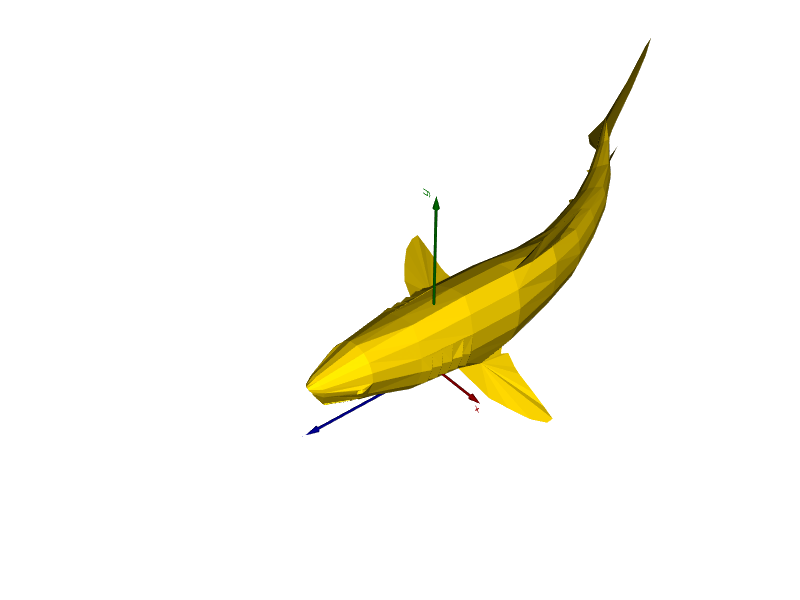

In [8]:
shark = Mesh(dataurl + "shark.ply")
shark_points = shark.points()
show(shark, axes=3, viewup="y", title="default shark")

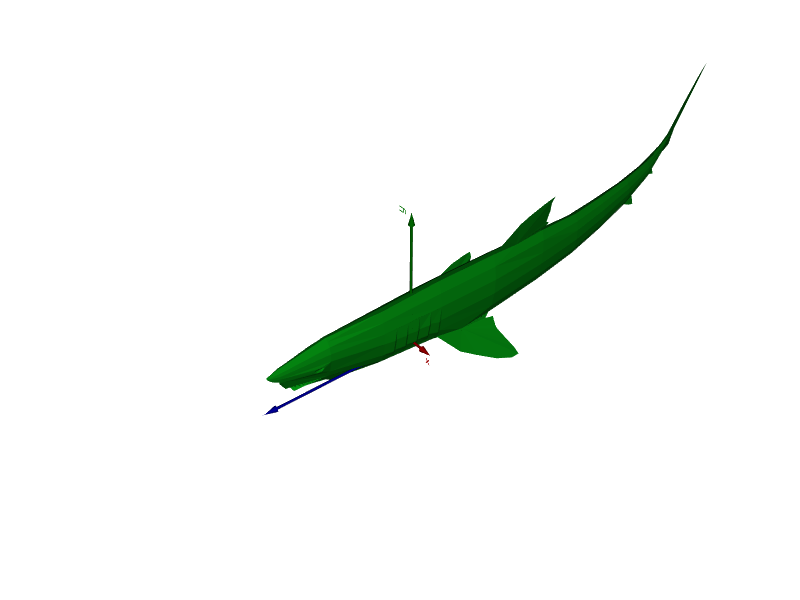

In [9]:
scaled_shark = shark.clone()
scaled_points = cartesian_scale(shark_points, 1.0, 2.0, 3.0)
scaled_shark.points(scaled_points)
scaled_shark.c("green")
show(scaled_shark, axes=3, viewup="y", title="cartesian scaled shark")

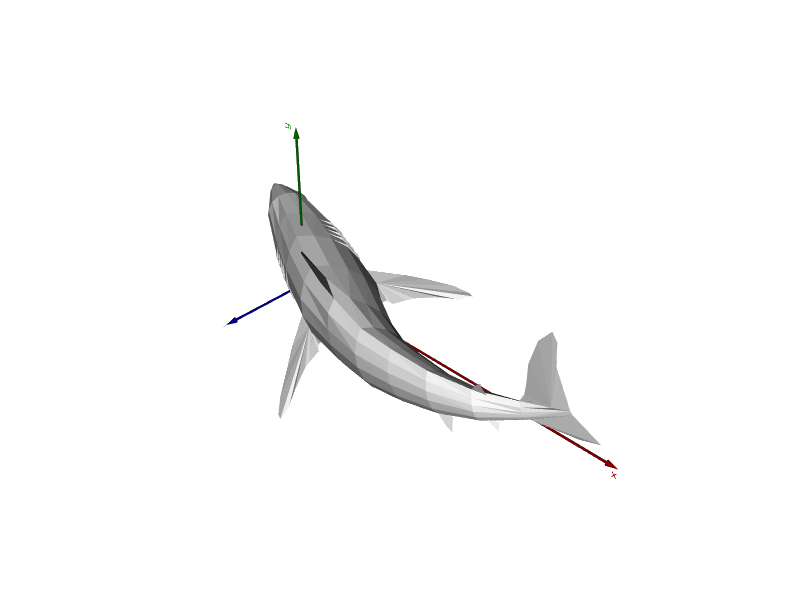

In [10]:
rotated_shark = shark.clone()
rotated_points = cartesian_rotation(shark_points, 0.0, 90.0, 0.0)
rotated_shark.points(rotated_points)
rotated_shark.c("white")
show(rotated_shark, axes=3, viewup="y", title="cartesian rotated shark")

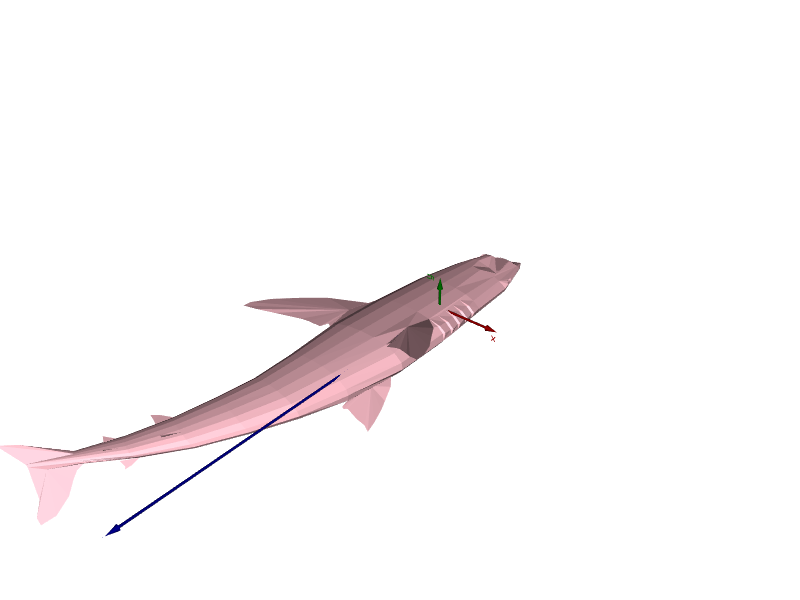

In [11]:
combined_shark = shark.clone()
combined_points = cartesian_reflection(shark_points, False, True, True)
combined_points = homogenous_scale(combined_points, 1, 0.3, 1)
combined_shark.points(combined_points)
combined_shark.c("pink")
show(combined_shark, axes=3, viewup="y", title="cartesian combined shark")

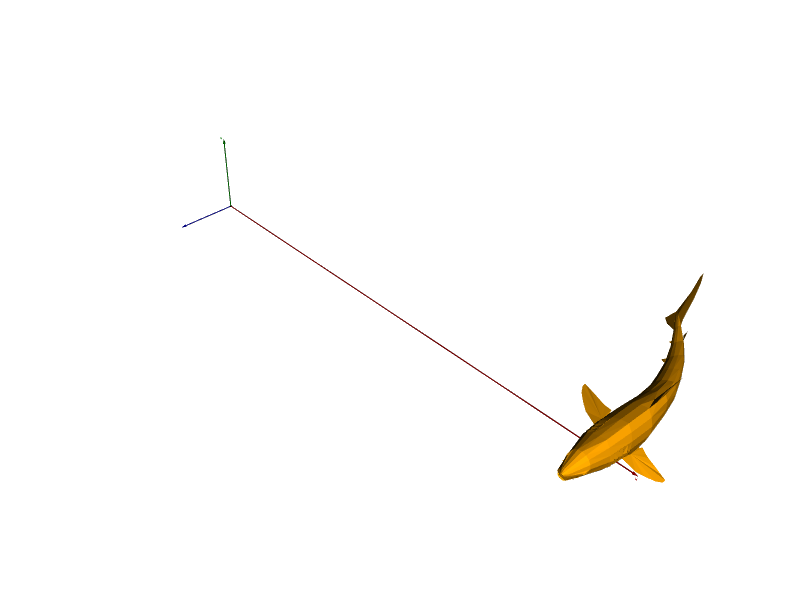

In [12]:
translated_shark = shark.clone()
translated_points = homogenous_translate(shark_points, 10.0, 0.0, 0.0)
translated_shark.points(translated_points)
translated_shark.c("orange")

show(translated_shark, axes=3, viewup="y", title="homogenous translated shark")

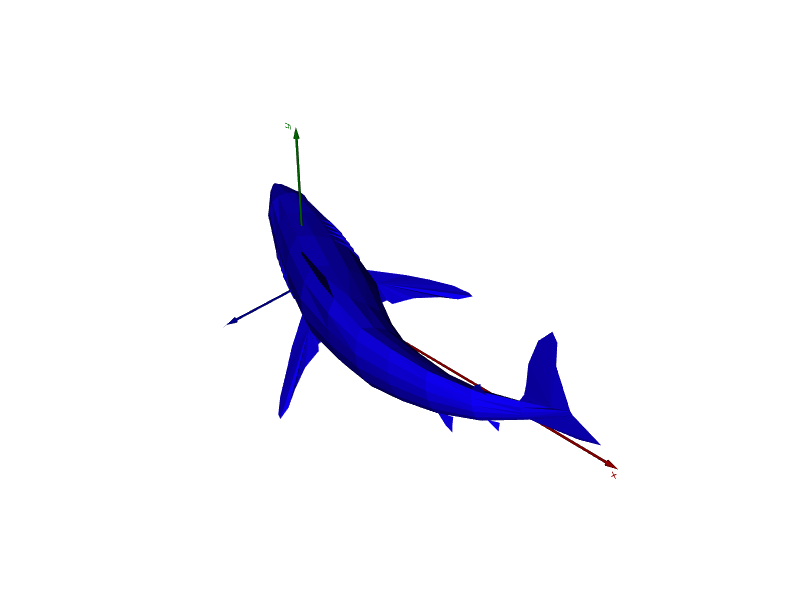

In [13]:
rotated_shark = shark.clone()
rotated_points = homogenous_rotation(shark_points, 0.0, 90.0, 0.0)
rotated_shark.points(rotated_points)
rotated_shark.c("blue")
show(rotated_shark, axes=3, viewup="y", title="homogenous rotated shark")

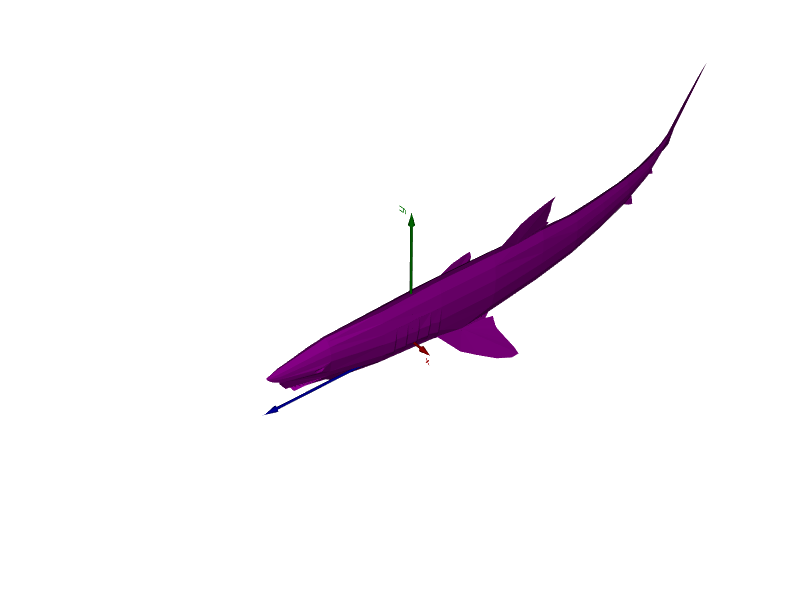

In [14]:
scaled_shark = shark.clone()
scaled_points = homogenous_scale(shark_points, 1.0, 2.0, 3.0)
scaled_shark.points(scaled_points)
scaled_shark.c("purple")
show(scaled_shark, axes=3, viewup="y", title="homogenous scaled shark")

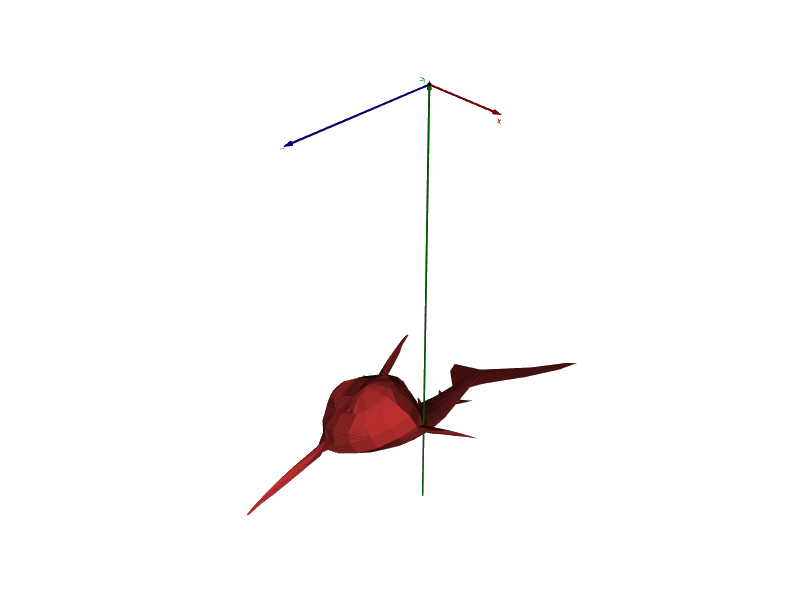

In [17]:
combined_homogenous_shark = shark.clone()
combined_homogenous_points = homogenous_scale(shark_points, 5.0, 5.0, 1.0)
combined_homogenous_points = homogenous_translate(combined_homogenous_points, 0.0, -10.0, -10.0)
combined_homogenous_points = homogenous_rotation(combined_homogenous_points, 45.0, 45.0, 0.0)
combined_homogenous_shark.points(combined_homogenous_points)
combined_homogenous_shark.c("brown")
show(combined_homogenous_shark, axes=3, viewup="y", title="homogenous scaled shark")